## Seth TIQC File

In [38]:
# import libraries
import pandas as pd
from matplotlib import pyplot as plt
import scipy.stats as stats

In [2]:
# import .csv/excel files
filepath='/home/seth/Documents/tech_incubator/survey_responses/'
post_survey_1 = pd.read_excel(filepath+'Post-InternshipServeyResponses.xlsx', sheet_name="Form Responses 1")
post_survey_2 = pd.read_excel(filepath+'TIQC_Post-InternshipSurveyResponses.xlsx', sheet_name="Form Responses 1")
pre_survey = pd.read_excel(filepath+'Pre-InternshipSurveyResponses.xlsx', sheet_name="Form Responses 1")

In [3]:
column_names_post_survey_1 = [
    'How comfortable do you feel with the following workplace skills upon completion of your internship ? [Leadership ]',
    'How comfortable do you feel with the following workplace skills upon completion of your internship ? [Ability to work in a team ]',
    'How comfortable do you feel with the following workplace skills upon completion of your internship ? [Writing Effectively ]',
    'How comfortable do you feel with the following workplace skills upon completion of your internship ? [Speaking Effectively ]',
    'How comfortable do you feel with the following workplace skills upon completion of your internship ? [Problem Solving ]',
    'How comfortable do you feel with the following workplace skills upon completion of your internship ? [Initiative ]',
    'How comfortable do you feel with the following workplace skills upon completion of your internship ? [Analytical/Quantitative ]'
]
column_names_pre_survey = [
    'How comfortable are you with the following workplace skills? [Leadership ]',
    'How comfortable are you with the following workplace skills? [Ability to work in a team ]',
    'How comfortable are you with the following workplace skills? [Writing Effectively ]',
    'How comfortable are you with the following workplace skills? [Speaking Effectively ]',
    'How comfortable are you with the following workplace skills? [Problem Solving ]',
    'How comfortable are you with the following workplace skills? [Initiative ]',
    'How comfortable are you with the following workplace skills? [Analytical/Quantitative ]'
]
valid_responses = [
    'Extremely Uncomfortable',
    'Moderately Uncomfortable',
    'Neutral',
    'Moderately Comfortable',
    'Extremely Comfortable'
]

In [5]:
#for col in column_names_post_survey_1:
#    post_survey_1 = post_survey_1[post_survey_1[col].isin(valid_responses)]
#for col in column_names_pre_survey:
#    pre_survey = pre_survey[pre_survey[col].isin(valid_responses)]

In [13]:
print(post_survey_1.shape)
print(pre_survey.shape)

21
(176, 13)


In [5]:
paired_data = []
for col_pre, col_post in zip(column_names_pre_survey, column_names_post_survey_1):
    output_post1 = post_survey_1[post_survey_1[[col_post]][col_post].isin(valid_responses)].groupby(
        col_post, as_index=True)[col_post].count().to_frame().rename(columns={col_post: 'count'})
    output_pre = pre_survey[pre_survey[[col_pre]][col_pre].isin(valid_responses)].groupby(col_pre, as_index=True)[
        col_pre].count().to_frame().rename(columns={col_pre: 'count'})
    joined_data = output_post1.join(
        other=output_pre, how='outer', lsuffix="_post_survey", rsuffix="_pre_survey")
    joined_data.count_post_survey = joined_data.count_post_survey.fillna(
        0).astype(int)
    joined_data = joined_data.reindex(valid_responses)

    paired_data.append([col_pre, col_post, joined_data])

In [14]:
pre_survey_size = pre_survey.shape[0]
post_survey_size = post_survey_1.shape[0]
for pair in paired_data:
    print(pair[0], post_survey_size-pair[2]['count_post_survey'].sum(), pre_survey_size-pair[2]['count_pre_survey'].sum())

How comfortable are you with the following workplace skills? [Leadership ] 0 5
How comfortable are you with the following workplace skills? [Ability to work in a team ] 1 0
How comfortable are you with the following workplace skills? [Writing Effectively ] 2 3
How comfortable are you with the following workplace skills? [Speaking Effectively ] 1 4
How comfortable are you with the following workplace skills? [Problem Solving ] 0 4
How comfortable are you with the following workplace skills? [Initiative ] 1 3
How comfortable are you with the following workplace skills? [Analytical/Quantitative ] 2 4


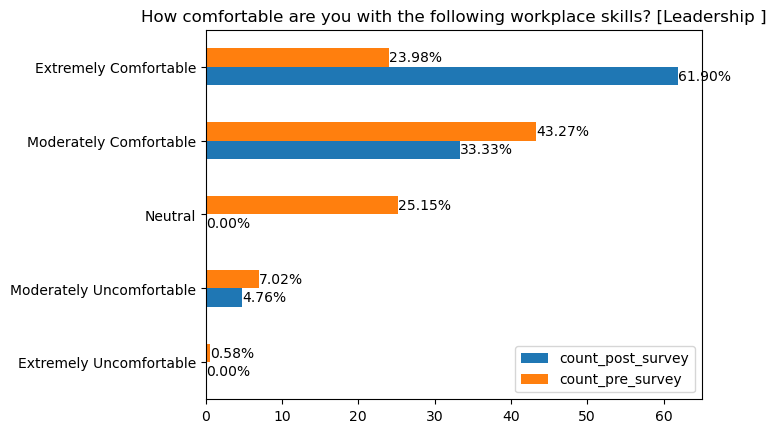

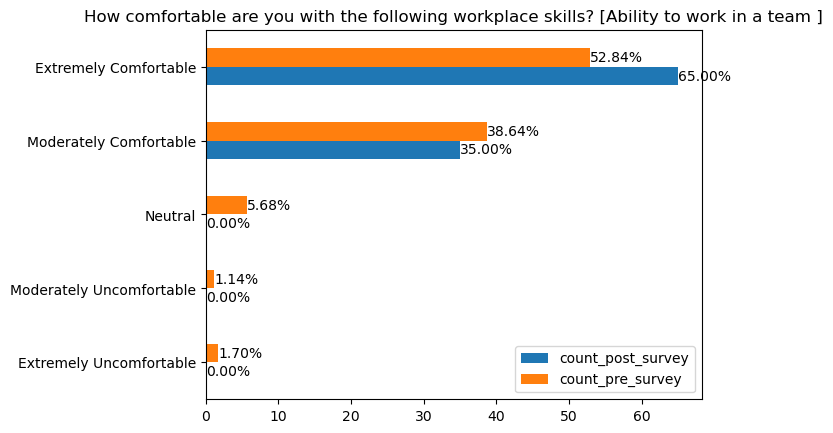

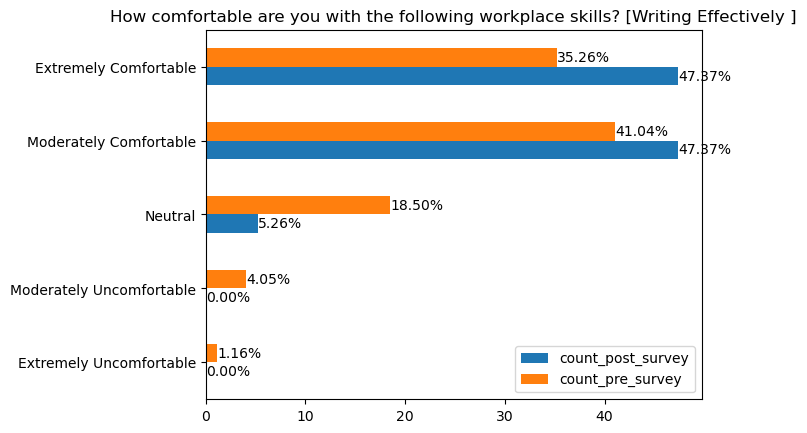

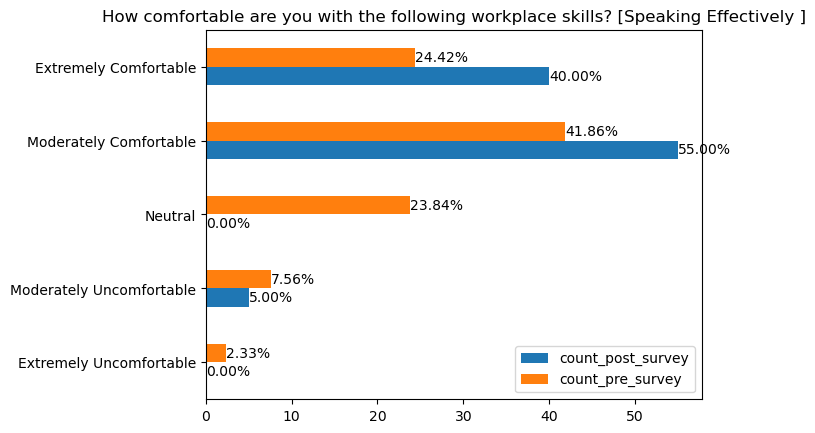

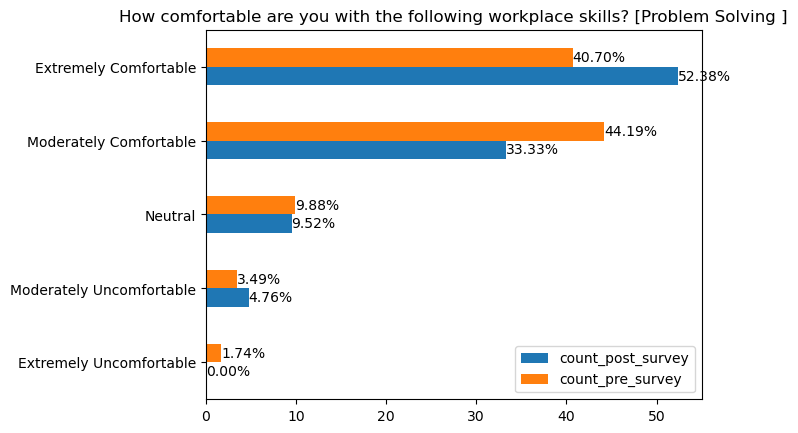

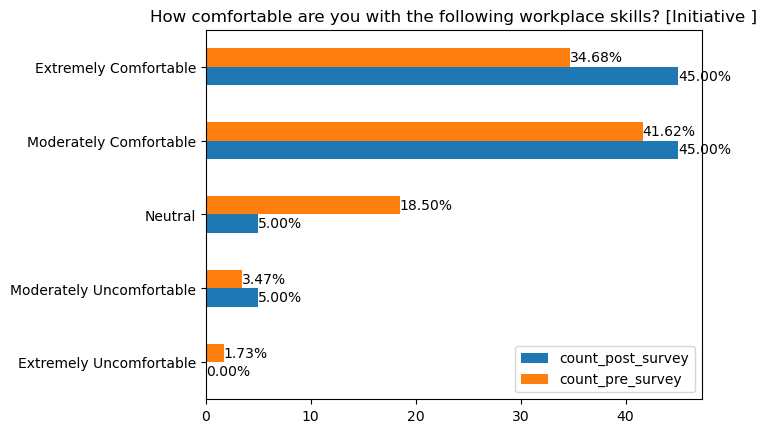

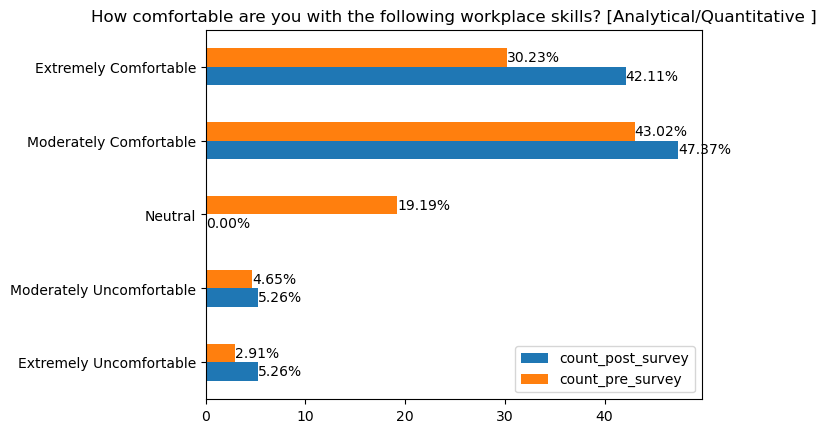

In [42]:
for obj in paired_data:
    df = pd.DataFrame(obj[2])
    cols = df.columns
    df[cols] = df[cols].div(df[cols].sum(axis=0), axis=1).multiply(100)

    ax = df.plot(kind='barh', stacked=False, title=obj[0])

    for bars in ax.containers:
        ax.bar_label(container=bars, fmt='%.2f%%', label_type='edge')
    ax.legend(loc='lower right')

    plt.savefig(fname = './images/bar_' + obj[0].replace("l/Q", "l_Q") + '.png', dpi=300, bbox_inches='tight')    

In [ ]:
# pie charts
#ax.set_xlabel("Percent who answered")
    #ax.set_ylabel("Answer options")
    #ax.legend(loc='lower right')
    #ax.xaxis.grid()

    #plt.savefig(fname = './images/pie_' + obj[0].replace("l/Q", "l_Q") + '.png', dpi=300, bbox_inches='tight')

    #plt.close()

In [37]:
for obj in paired_data:
    fvalue, pvalue = stats.f_oneway(obj[2].count_pre_survey, obj[2].count_post_survey)
    print(obj[0], fvalue, pvalue)

How comfortable are you with the following workplace skills? [Leadership ] 5.2423112767940365 0.051296116817457965
How comfortable are you with the following workplace skills? [Ability to work in a team ] 2.6564785503765957 0.14177642540151306
How comfortable are you with the following workplace skills? [Writing Effectively ] 4.8105476673428 0.05961383531041195
How comfortable are you with the following workplace skills? [Speaking Effectively ] 6.154501864677679 0.038062565989189716
How comfortable are you with the following workplace skills? [Problem Solving ] 3.52138996138996 0.09742304090253144
How comfortable are you with the following workplace skills? [Initiative ] 4.739623405547682 0.061141290922987555
How comfortable are you with the following workplace skills? [Analytical/Quantitative ] 5.326279863481228 0.04985430884680186
